In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import os

In [5]:
data = pd.read_csv("OnlineRetail.csv", encoding='ISO-8859-1')

print(data.head())
print(data.info())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

.ÿ≠ÿßŸÑÿß ÿ®ÿ±ÿß€å ÿßÿØÿßŸÖŸá ⁄©ÿßÿ± ÿ®ÿß€åÿØ ÿØ€åÿ™ÿßŸÖŸàŸÜŸà ÿ™ŸÖ€åÿ≤ ⁄©ŸÜ€åŸÖ
ÿ≠ÿ∞ŸÅ ÿßÿ®ÿ¨⁄©ÿ™ Ÿáÿß€å€å ⁄©Ÿá Ÿà€å⁄ò⁄Ø€å Ÿáÿß€å€å ÿÆÿßŸÑ€å ÿØÿßÿ±ŸÜÿØ
Ÿà ÿ≠ÿ∞ŸÅ ÿØ€åÿ™ÿß Ÿáÿß€å ŸÖÿ¥⁄©Ÿà⁄© Ÿà ŸÖŸÜŸÅ€å

In [6]:
data_clean = data.dropna()

data_clean = data_clean[(data_clean['Quantity'] > 0) & (data_clean['UnitPrice'] > 0)]

#ÿß€åÿ¨ÿßÿØ Ÿà€å⁄ò⁄Ø€å ŸÖÿπŸÜ€å‚ÄåÿØÿßÿ± ÿ®ÿ±ÿß€å ÿ™ÿ≠ŸÑ€åŸÑ
data_clean['TotalPrice'] = data_clean['Quantity'] * data_clean['UnitPrice']


ÿØ€åÿ™ÿß€å ÿ¨ÿØ€åÿØŸÖŸàŸÜ

In [7]:
print(data_clean.head())
print(data_clean.describe())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom       15.30  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom       20.34  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom       22.00  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom       20.34  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom       20.34  
            Quantity      UnitPrice     CustomerID     TotalPrice
count  397884.000000  397884.000000  397884.000000  397884.000000
mean     

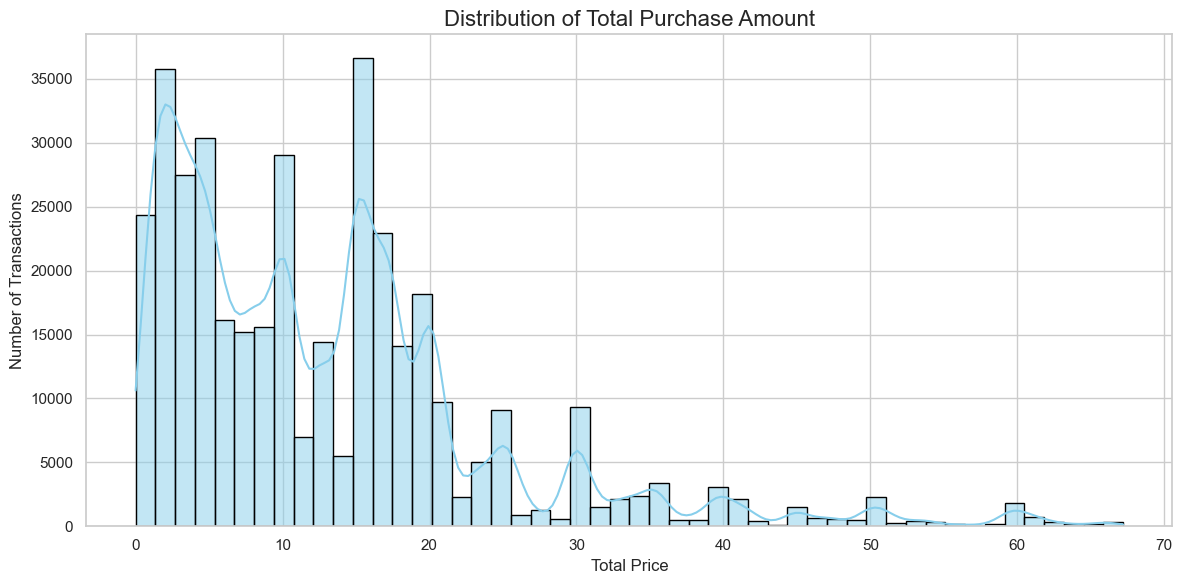

In [8]:
filtered_data = data_clean[data_clean['TotalPrice'] < data_clean['TotalPrice'].quantile(0.95)]

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(filtered_data['TotalPrice'], bins=50, kde=True, color='skyblue', edgecolor='black')

plt.title("Distribution of Total Purchase Amount", fontsize=16)
plt.xlabel("Total Price", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.tight_layout()
plt.show()


Ÿá€åÿ≥ÿ™Ÿà⁄Øÿ±ÿßŸÖ: ÿ™ÿπÿØÿßÿØ ŸÜŸÖŸàŸÜŸá‚ÄåŸáÿß ÿØÿ± Ÿáÿ± ÿ®ÿßÿ≤Ÿá ÿ±Ÿà ŸÜÿ¥ŸàŸÜ ŸÖ€åÿØŸá

ÿÆÿ∑ : ÿ™Ÿàÿ≤€åÿπ ⁄©ŸÑ€å Ÿà ŸÜÿ±ŸÖ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ±Ÿà ŸÜŸÖÿß€åÿ¥ ŸÖ€åÿØŸá 

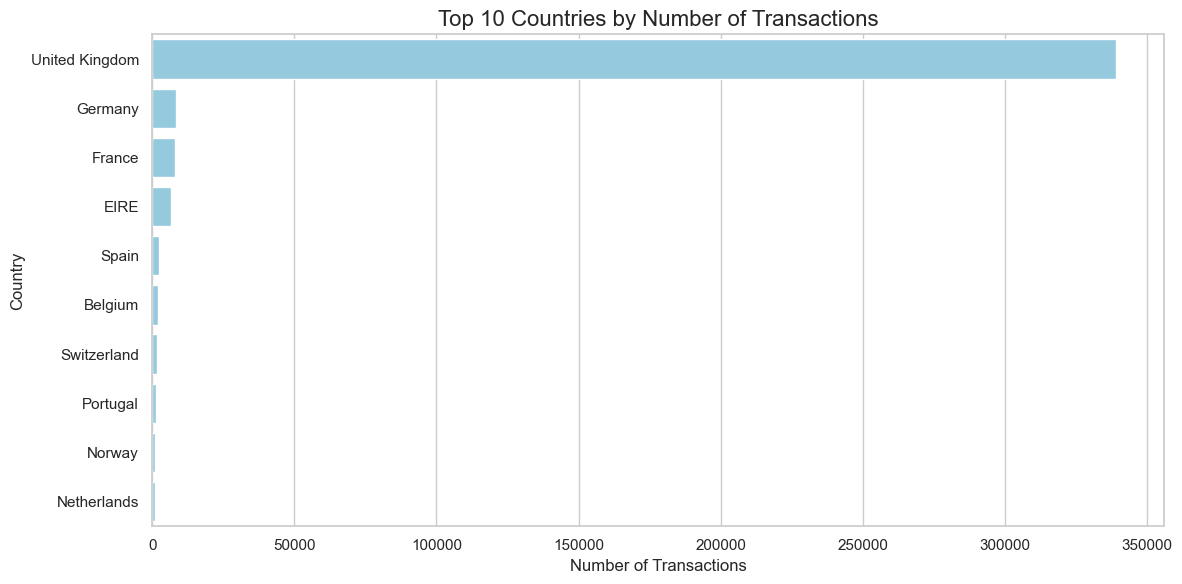

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
country_counts = filtered_data['Country'].value_counts().head(10)
sns.barplot(x=country_counts.values, y=country_counts.index, color='skyblue')
plt.title("Top 10 Countries by Number of Transactions", fontsize=16)
plt.xlabel("Number of Transactions", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25364\3296855287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['InvoiceDate'] = pd.to_datetime(filtered_data['InvoiceDate'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25364\3296855287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Month'] = filtered_data['InvoiceDate'].dt.to_period('M')


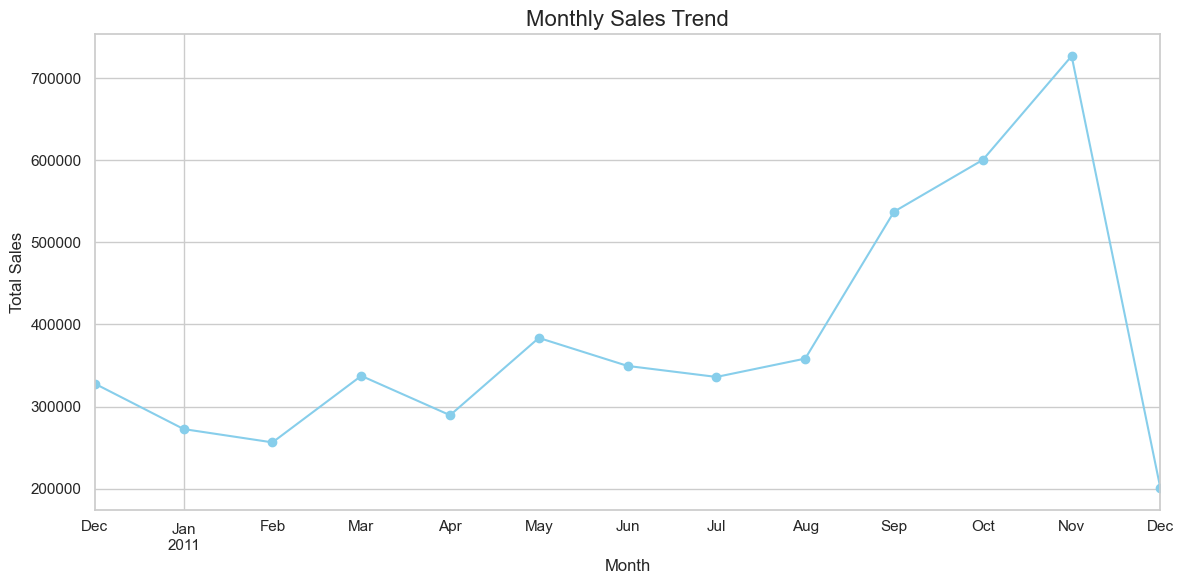

In [10]:
filtered_data['InvoiceDate'] = pd.to_datetime(filtered_data['InvoiceDate'])
filtered_data['Month'] = filtered_data['InvoiceDate'].dt.to_period('M')
monthly_sales = filtered_data.groupby('Month')['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='skyblue')
plt.title("Monthly Sales Trend", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25364\965315748.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


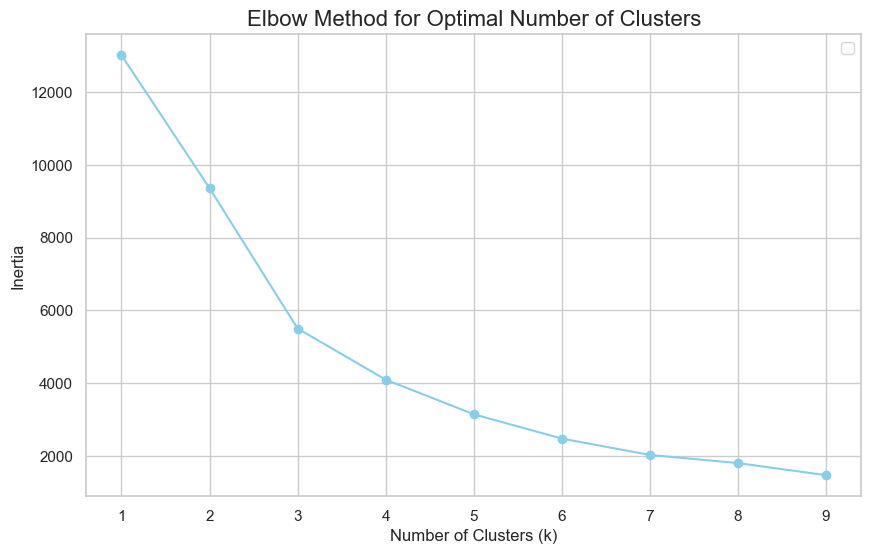

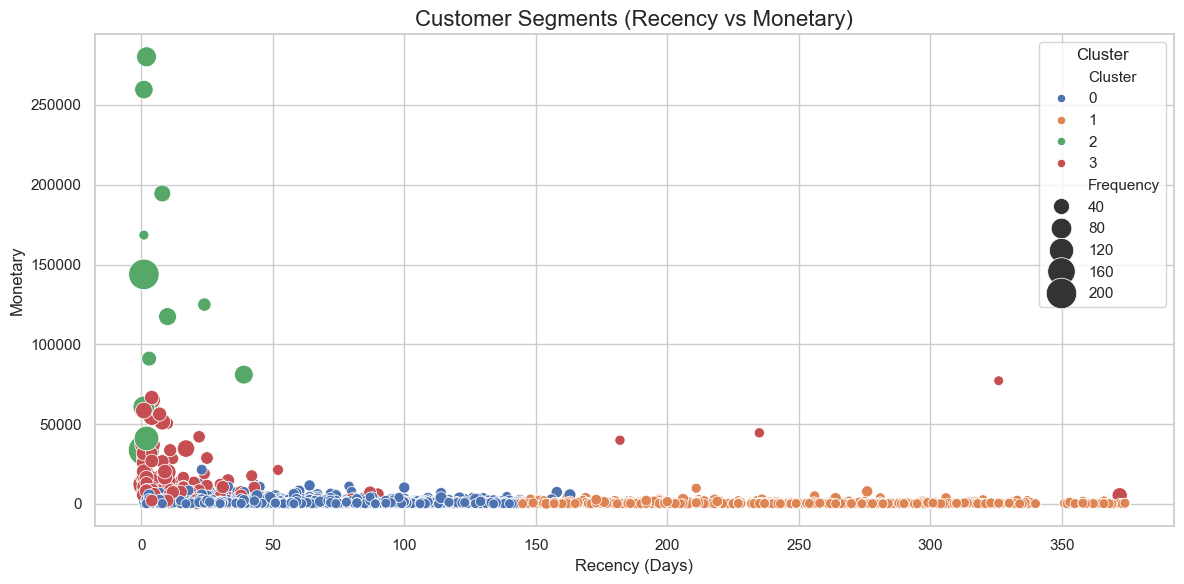

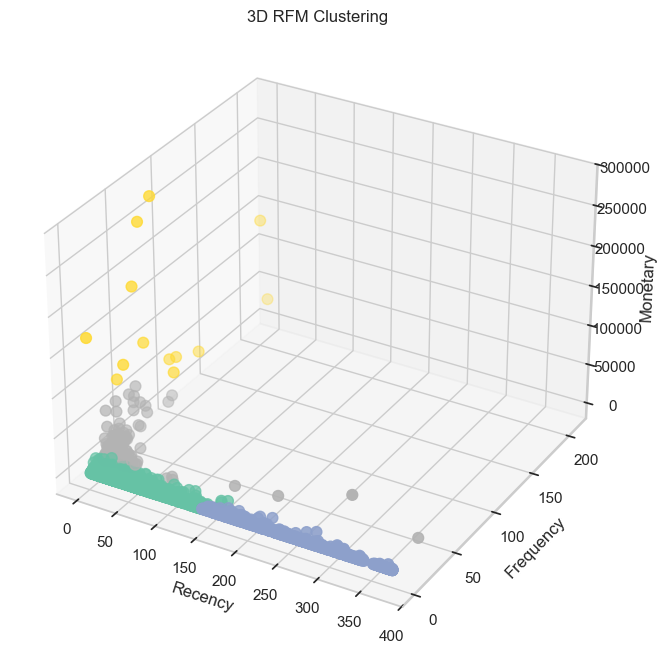

In [11]:

# ÿ™ÿ®ÿØ€åŸÑ  ÿ®Ÿá ŸÅÿ±ŸÖÿ™ ÿ™ÿßÿ±€åÿÆ
data_clean['InvoiceDate'] = pd.to_datetime(data_clean['InvoiceDate'])

# ŸÖÿ±ÿ≠ŸÑŸá 1: ŸÖÿ≠ÿßÿ≥ÿ®Ÿá RFM
# ÿ™ÿßÿ±€åÿÆ ŸÖÿ±ÿ¨ÿπ ÿ®ÿ±ÿß€å Recency
snapshot_date = data_clean['InvoiceDate'].max() + pd.Timedelta(days=1)

# ⁄Øÿ±ŸàŸá‚Äåÿ®ŸÜÿØ€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ CustomerID ÿ®ÿ±ÿß€å ŸÖÿ≠ÿßÿ≥ÿ®Ÿá RFM
rfm = data_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'  # Monetary
}).reset_index()

# ÿ™ÿ∫€å€åÿ± ÿßÿ≥ŸÖ ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# ŸÖÿ±ÿ≠ŸÑŸá 2: ŸÜÿ±ŸÖÿßŸÑ‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá‚ÄåŸáÿß
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# ŸÖÿ±ÿ≠ŸÑŸá 3: ÿßŸÜÿ™ÿÆÿßÿ® ÿ™ÿπÿØÿßÿØ ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß ÿ®ÿß ÿ±Ÿàÿ¥ Elbow
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ± Elbow
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o', color='skyblue')
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=16)
plt.legend()
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.grid(True)
plt.show()

# ŸÖÿ±ÿ≠ŸÑŸá 4: ÿßÿ¨ÿ±ÿß€å K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# ŸÖÿ±ÿ≠ŸÑŸá 5: ÿ™ÿ≠ŸÑ€åŸÑ ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß
# ŸÖ€åÿßŸÜ⁄Ø€åŸÜ RFM ÿ®ÿ±ÿß€å Ÿáÿ± ÿÆŸàÿ¥Ÿá
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).reset_index()
cluster_summary.columns = ['Cluster', 'Avg_Recency', 'Avg_Frequency', 'Avg_Monetary', 'Customer_Count']

# üí° ÿßŸÅÿ≤ŸàÿØŸÜ ŸÜÿßŸÖ ÿ®Ÿá ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß
cluster_names = {
    0: 'ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ ŸàŸÅÿßÿØÿßÿ± ÿßŸÇÿ™ÿµÿßÿØ€å üü°',
    1: 'ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ VIP üü¢',
    2: 'ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ ÿßÿ≤‚ÄåÿØÿ≥ÿ™‚Äåÿ±ŸÅÿ™Ÿá üî¥',
    3: 'ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ ÿ∫€åÿ±ŸÅÿπÿßŸÑ ‚ö™Ô∏è'
}
rfm['Cluster_Name'] = rfm['Cluster'].map(cluster_names)
cluster_summary['Cluster_Name'] = cluster_summary['Cluster'].map(cluster_names)

# ŸÖÿµŸàÿ±ÿ≥ÿßÿ≤€å ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß 
plt.figure(figsize=(12, 6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Monetary'], hue=rfm['Cluster'], palette='deep', size=rfm['Frequency'], sizes=(50, 500))
plt.title('Customer Segments (Recency vs Monetary)', fontsize=16)
plt.xlabel('Recency (Days)', fontsize=12)
plt.ylabel('Monetary', fontsize=12)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# ÿ∞ÿÆ€åÿ±Ÿá ŸÜÿ™ÿß€åÿ¨ RFM Ÿà ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß
rfm.to_csv('rfm_clusters.csv', index=False)

# ŸÖÿµŸàÿ±ÿ≥ÿßÿ≤€å 3 ÿ®ÿπÿØ€å RFM
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], 
           c=rfm['Cluster'], cmap='Set2', s=60)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D RFM Clustering')
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_25364\3450887427.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Recency', data=rfm, palette='Set2')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25364\3450887427.py:7: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
d:\code\python\Classtering with K-mean\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


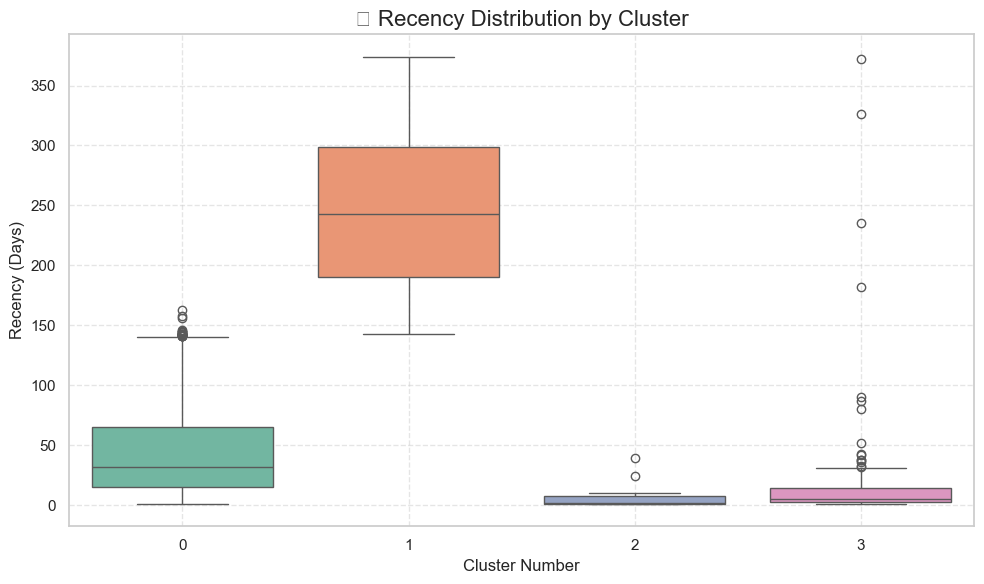

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25364\3450887427.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Frequency', data=rfm, palette='Set3')
d:\code\python\Classtering with K-mean\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


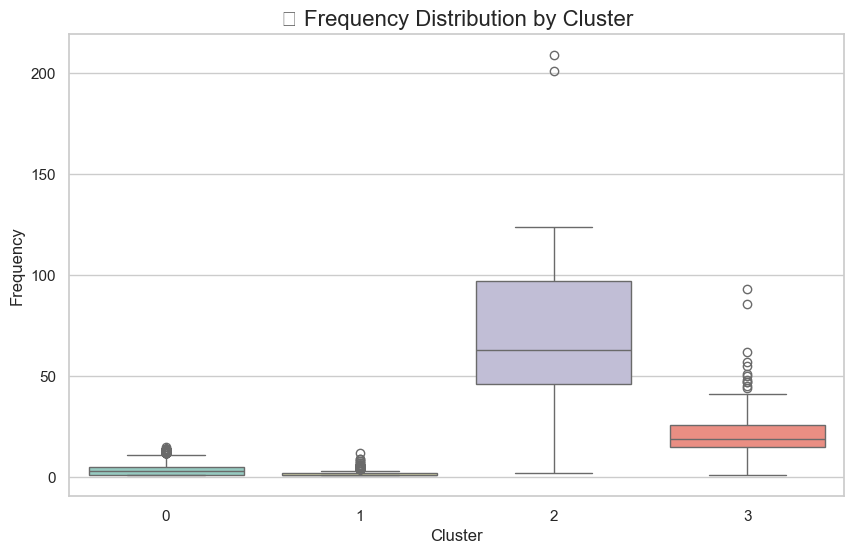

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25364\3450887427.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Monetary', data=rfm, palette='Set1')
d:\code\python\Classtering with K-mean\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


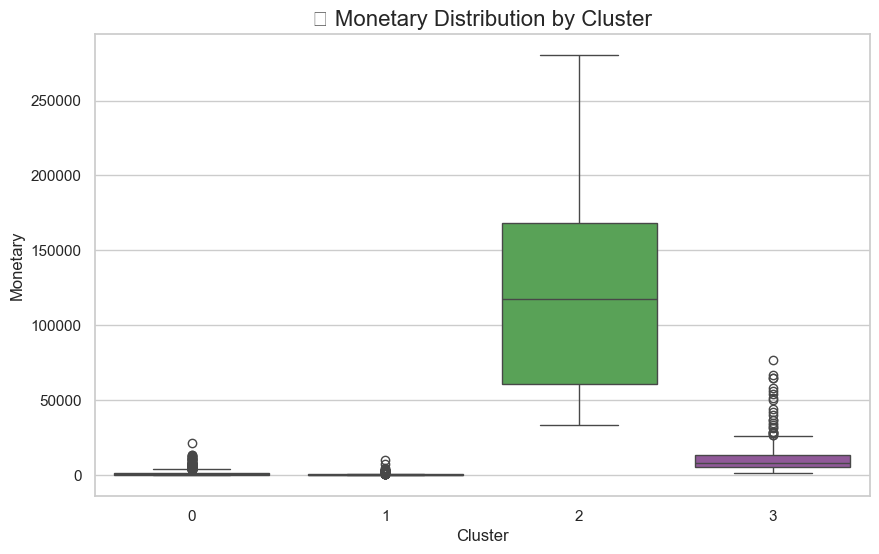

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Recency', data=rfm, palette='Set2')
plt.title('üì¶ Recency Distribution by Cluster', fontsize=16)
plt.xlabel('Cluster Number', fontsize=12)
plt.ylabel('Recency (Days)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Frequency', data=rfm, palette='Set3')
plt.title('üõí Frequency Distribution by Cluster', fontsize=16)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Monetary', data=rfm, palette='Set1')
plt.title('üí∞ Monetary Distribution by Cluster', fontsize=16)
plt.show()


ÿØÿ± ÿß€åŸÜ ŸÖÿ±ÿ≠ŸÑŸáÿå ŸáÿØŸÅ ŸÖÿß ÿß€åŸÜ ÿßÿ≥ÿ™ ⁄©Ÿá ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ Ÿáÿ± ÿÆŸàÿ¥Ÿá ÿ±ÿß ÿ®Ÿá‚ÄåÿµŸàÿ±ÿ™ ÿ¨ÿØÿß⁄ØÿßŸÜŸá ÿØÿ± ŸÅÿß€åŸÑ‚ÄåŸáÿß€å  ÿ∞ÿÆ€åÿ±Ÿá ⁄©ŸÜ€åŸÖ ÿ™ÿß ÿØÿ± ÿ¢€åŸÜÿØŸá ÿ®ÿ™ŸàÿßŸÜ€åŸÖ ÿ®ÿß ÿ¢ŸÜ‚ÄåŸáÿß ÿ®Ÿá‚ÄåÿµŸàÿ±ÿ™ ÿßÿÆÿ™ÿµÿßÿµ€å ⁄©ÿßÿ± ⁄©ŸÜ€åŸÖ

In [13]:
for cluster_label, cluster_name in cluster_names.items():
 
    cluster_data = rfm[rfm['Cluster'] == cluster_label]
    
    
    safe_name = cluster_name.replace(' ', '_').replace('üü°','').replace('üü¢','').replace('üî¥','').replace('‚ö™Ô∏è','')
    
    
    filename = f"{safe_name}.csv"
    
   
    cluster_data.to_csv(filename, index=False, encoding='utf-8-sig')

In [14]:
# ÿ™ÿßÿ®ÿπ ⁄Øÿ±ŸÅÿ™ŸÜ ŸÑ€åÿ≥ÿ™ ŸÖÿ¥ÿ™ÿ±€å‚ÄåŸáÿß ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ŸÜÿßŸÖ ÿÆŸàÿ¥Ÿá
cluster_names = {
    0: 'ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ ŸàŸÅÿßÿØÿßÿ± ÿßŸÇÿ™ÿµÿßÿØ€å üü°',
    1: 'ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ VIP üü¢',      
    2: 'ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ ÿßÿ≤‚ÄåÿØÿ≥ÿ™‚Äåÿ±ŸÅÿ™Ÿá üî¥',
    3: 'ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ ÿ∫€åÿ±ŸÅÿπÿßŸÑ ‚ö™Ô∏è'
}
def get_customers_by_cluster_name(cluster_name, rfm_df, cluster_map):
    normalized_input = cluster_name.replace(' ', '_').strip()

    selected_cluster = None
    for key, val in cluster_map.items():
        if normalized_input in val.replace(' ', '_'):
            selected_cluster = key
            break

    if selected_cluster is not None:
        customer_ids = rfm_df[rfm_df['Cluster'] == selected_cluster]['CustomerID'].tolist()
        for cid in customer_ids:
            print("-", cid)
    else:
        print("ÿÆŸàÿ¥Ÿá ŸÖŸàÿ±ÿØ ŸÜÿ∏ÿ± Ÿæ€åÿØÿß ŸÜÿ¥ÿØ:")
        

#vip_customers = get_customers_by_cluster_name("ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ VIP", rfm, cluster_names) ŸÖÿ´ÿßŸÑ ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ÿ™ÿßÿ®ÿπ
vip_customers = get_customers_by_cluster_name("ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ VIP", rfm, cluster_names)

- 12350.0
- 12353.0
- 12354.0
- 12355.0
- 12361.0
- 12365.0
- 12373.0
- 12377.0
- 12383.0
- 12386.0
- 12401.0
- 12402.0
- 12405.0
- 12410.0
- 12414.0
- 12424.0
- 12426.0
- 12441.0
- 12447.0
- 12450.0
- 12468.0
- 12489.0
- 12493.0
- 12501.0
- 12506.0
- 12509.0
- 12514.0
- 12515.0
- 12521.0
- 12547.0
- 12548.0
- 12551.0
- 12559.0
- 12561.0
- 12564.0
- 12565.0
- 12573.0
- 12574.0
- 12580.0
- 12582.0
- 12585.0
- 12590.0
- 12591.0
- 12601.0
- 12614.0
- 12622.0
- 12623.0
- 12625.0
- 12639.0
- 12648.0
- 12651.0
- 12652.0
- 12653.0
- 12665.0
- 12669.0
- 12672.0
- 12686.0
- 12690.0
- 12707.0
- 12717.0
- 12725.0
- 12732.0
- 12733.0
- 12734.0
- 12735.0
- 12736.0
- 12738.0
- 12754.0
- 12755.0
- 12764.0
- 12769.0
- 12770.0
- 12785.0
- 12790.0
- 12791.0
- 12792.0
- 12793.0
- 12797.0
- 12802.0
- 12809.0
- 12811.0
- 12815.0
- 12817.0
- 12818.0
- 12821.0
- 12829.0
- 12831.0
- 12833.0
- 12834.0
- 12837.0
- 12845.0
- 12852.0
- 12855.0
- 12857.0
- 12866.0
- 12868.0
- 12872.0
- 12873.0
- 12878.0
- 12881.0
